In [1]:
import pandas as pd
from ast import literal_eval

generic = lambda x: literal_eval(x)
conv = {'nutrition' : generic, 'steps' : generic, 'ingredients' : generic, 'id_column' : generic}
df = pd.read_csv(r"C:\Users\01din\PycharmProjects\thesis\data\raw\recipes\RAW_recipes.csv", converters=conv)
df_ingredients = pd.read_csv("../data/ingredients/ingredients_nutrition.csv")
df

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,16/09/2005,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7
1,a bit different breakfast pizza,31490,30,26278,17/06/2002,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6
2,all in the kitchen chili,112140,130,196586,25/02/2005,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13
3,alouette potatoes,59389,45,68585,14/04/2003,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,[place potatoes in a large pot of lightly salt...,"this is a super easy, great tasting, make ahea...","[spreadable cheese with garlic and herbs, new ...",11
4,amish tomato ketchup for canning,44061,190,41706,25/10/2002,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"[mix all ingredients& boil for 2 1 / 2 hours ,...",my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,29/08/2012,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"[heat oil in a 4-quart dutch oven, add celery ...",this is a delicious soup that i originally fou...,"[celery, onion, green sweet pepper, garlic clo...",22
231633,zydeco spice mix,493372,5,1500678,09/01/2013,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,[mix all ingredients together thoroughly],this spice mix will make your taste buds dance!,"[paprika, salt, garlic powder, onion powder, d...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,07/06/2008,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"[in a bowl , combine the mashed yolks and mayo...","deviled eggs, cajun-style","[hard-cooked eggs, mayonnaise, dijon mustard, ...",8
231635,cookies by design cookies on a stick,298512,29,506822,15/04/2008,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,[place melted butter in a large mixing bowl an...,"i've heard of the 'cookies by design' company,...","[butter, eagle brand condensed milk, light bro...",10


Let's remove all recipes which contain ingredients which are occur less than 50 times. Note: df_ingredients has been prepocessed and created prior to this completely.
The only relevant information is that df_ingredients only contains ingredients which occur at least 50 times, so recipes with ingredients which are not in df_ingredients will also be dropped in here.

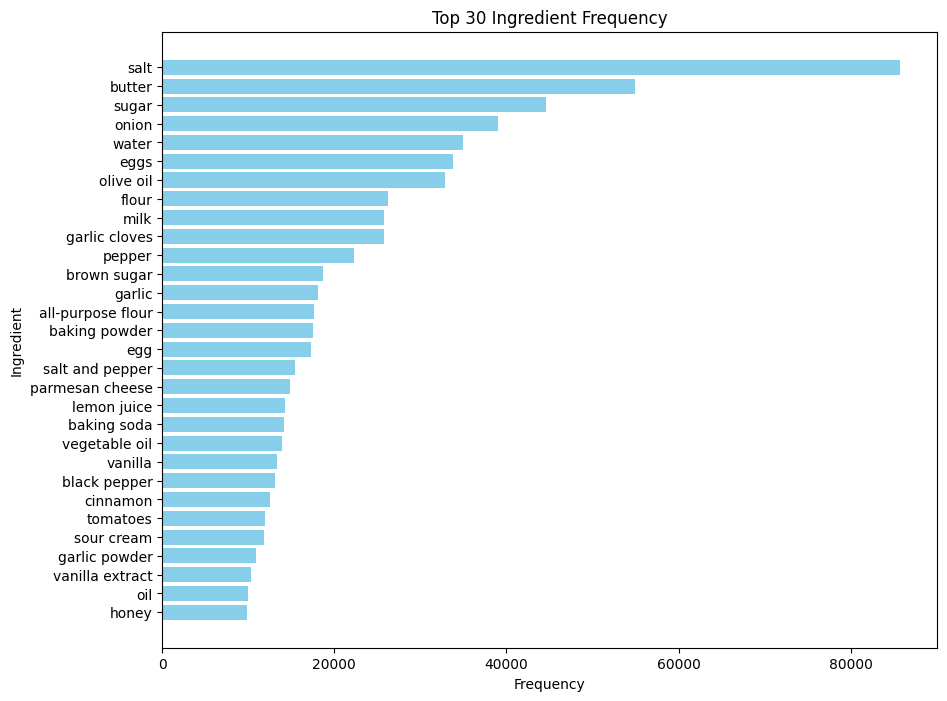

In [2]:
from collections import Counter
import matplotlib.pyplot as plt

ingredient_lists = df['ingredients']
all_ingredients = [ingredient for sublist in ingredient_lists for ingredient in sublist]


counter = Counter(all_ingredients)
ingredient_df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
ingredient_df.columns = ['Ingredient', 'Frequency']

ingredient_df = ingredient_df.sort_values('Frequency', ascending=False)

top_N = ingredient_df.head(30)


plt.figure(figsize=(10, 8))
plt.barh(top_N['Ingredient'], top_N['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Ingredient')
plt.title('Top 30 Ingredient Frequency')
plt.gca().invert_yaxis()
plt.show()


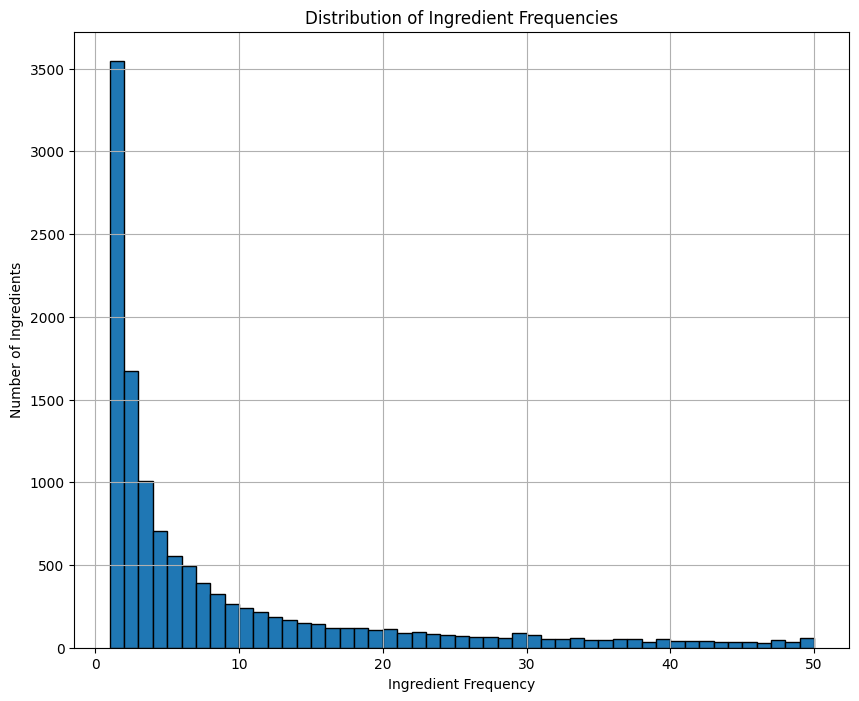

In [3]:
plt.figure(figsize=(10, 8))
plt.hist(ingredient_df['Frequency'], bins=range(1, 51), edgecolor='black')
plt.xlabel('Ingredient Frequency')
plt.ylabel('Number of Ingredients')
plt.title('Distribution of Ingredient Frequencies')
plt.grid(True)
plt.show()

In [5]:
total = ingredient_df.Ingredient.tolist()

In [6]:
removed = ingredient_df[ingredient_df.Frequency < 50].Ingredient.tolist()

In [7]:
len(total)

14942

In [8]:
len(removed)

12225

In [10]:
len(total)-len(removed)

2717

In [45]:
allowed_ingredients = set(df_ingredients['ingredient'])

def all_ingredients_allowed(ingredient_list):
    return all(ingredient in allowed_ingredients for ingredient in ingredient_list)

mask = df['ingredients'].apply(all_ingredients_allowed)
df_no_less_than_50 = df[mask]
df_no_less_than_50

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
2,all in the kitchen chili,112140,130,196586,25/02/2005,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13
5,apple a day milk shake,5289,0,1533,06/12/1999,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"[combine ingredients in blender, cover and ble...",NaN,"[milk, vanilla ice cream, frozen apple juice c...",4
6,aww marinated olives,25274,15,21730,14/04/2002,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,[toast the fennel seeds and lightly crush them...,my italian mil was thoroughly impressed by my ...,"[fennel seeds, green olives, ripe olives, garl...",9
7,backyard style barbecued ribs,67888,120,10404,30/07/2003,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,[in a medium saucepan combine all the ingredie...,this recipe is posted by request and was origi...,"[pork spareribs, soy sauce, fresh garlic, fres...",22
9,beat this banana bread,75452,70,15892,04/11/2003,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"[preheat oven to 350 degrees, butter two 9x5"" ...",from ann hodgman's,"[sugar, unsalted butter, bananas, eggs, fresh ...",9
...,...,...,...,...,...,...,...,...,...,...,...,...
231627,zwiebelwhe swiss onion tart,410985,165,993604,30/01/2010,"['weeknight', 'time-to-make', 'course', 'main-...","[440.1, 49.0, 15.0, 10.0, 22.0, 90.0, 9.0]",38,"[crust:, pulse flour , baking powder , and sal...",a delicious bacon-studded tart.,"[flour, baking powder, kosher salt, unsalted b...",13
231630,zydeco sauce,357451,15,461283,23/02/2009,"['15-minutes-or-less', 'time-to-make', 'course...","[239.9, 30.0, 19.0, 22.0, 1.0, 14.0, 5.0]",3,"[to make the sauce , combine the mayonnaise , ...",great sauce for cheeseburgers or dipping fries...,"[mayonnaise, prepared horseradish, worcestersh...",6
231631,zydeco shrimp wrap,188810,57,37779,03/10/2006,"['60-minutes-or-less', 'time-to-make', 'course...","[482.6, 13.0, 25.0, 37.0, 33.0, 9.0, 27.0]",14,"[bring 3 quarts salted to water to a boil, add...",a wrap inspired by great cajun flavors,"[white rice, vegetable oil, onion, green bell ...",11
231633,zydeco spice mix,493372,5,1500678,09/01/2013,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,[mix all ingredients together thoroughly],this spice mix will make your taste buds dance!,"[paprika, salt, garlic powder, onion powder, d...",13


This removed almost 80.000 rows. Let's remove all the recipes with a negative rating next.

In [46]:
interactions = pd.read_csv("../data/raw/interactions/RAW_interactions.csv", converters=conv)
interactions

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


(array([  5070.,    165.,   1516.,    701.,   3251.,   4499.,  12114.,
          9614.,  50530., 144177.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

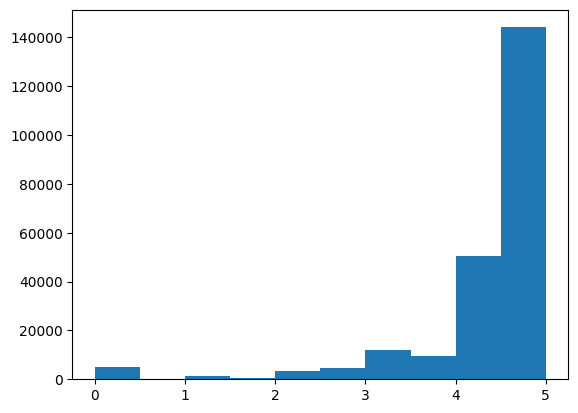

In [47]:
from matplotlib import pyplot as plt

grouped_interactions = interactions[['recipe_id', 'rating']].groupby(by='recipe_id').agg({'rating':'mean'})
plt.hist(grouped_interactions)

We see that most reviews are positive. We will only take recipes with a mean rating of 3 or larger.

In [48]:
grouped_interactions_positive = grouped_interactions[grouped_interactions.rating>=3].reset_index()
grouped_interactions_positive

,recipe_id,rating
0,38,4.250000
1,39,3.000000
2,40,4.333333
3,41,4.500000
4,46,5.000000
...,...,...
216430,537319,3.000000
216431,537458,5.000000
216432,537459,5.000000
216433,537485,5.000000


In [49]:
recipes_to_leave = grouped_interactions_positive.recipe_id.unique()
df_filtered = df_no_less_than_50[df_no_less_than_50.id.isin(recipes_to_leave)]
df_filtered

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
2,all in the kitchen chili,112140,130,196586,25/02/2005,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13
5,apple a day milk shake,5289,0,1533,06/12/1999,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"[combine ingredients in blender, cover and ble...",NaN,"[milk, vanilla ice cream, frozen apple juice c...",4
7,backyard style barbecued ribs,67888,120,10404,30/07/2003,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,[in a medium saucepan combine all the ingredie...,this recipe is posted by request and was origi...,"[pork spareribs, soy sauce, fresh garlic, fres...",22
9,beat this banana bread,75452,70,15892,04/11/2003,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"[preheat oven to 350 degrees, butter two 9x5"" ...",from ann hodgman's,"[sugar, unsalted butter, bananas, eggs, fresh ...",9
10,berry good sandwich spread,109439,5,49168,25/01/2005,"['15-minutes-or-less', 'time-to-make', 'course...","[79.2, 3.0, 58.0, 0.0, 0.0, 6.0, 5.0]",2,"[in medium size bowl , coarsely mash cranberry...",horseradish is one of my favorite condiments a...,"[whole berry cranberry sauce, sour cream, prep...",3
...,...,...,...,...,...,...,...,...,...,...,...,...
231625,zwiebeln salat swiss onion salad,455209,10,1058097,05/05/2011,"['15-minutes-or-less', 'time-to-make', 'course...","[113.5, 11.0, 17.0, 19.0, 2.0, 24.0, 3.0]",5,"[melt butter in a saucepan, add onions and sau...",adapted from pan american's compete round the ...,"[butter, onions, flour, salt, vinegar]",5
231626,zwiebelsuppe clear german onion soup,61748,35,27783,08/05/2003,"['60-minutes-or-less', 'time-to-make', 'course...","[252.0, 17.0, 21.0, 44.0, 21.0, 14.0, 7.0]",10,"[heat oil in a large pot, saute garlic slices ...",this is very different from french onion soup....,"[onions, red onions, fresh garlic, olive oil, ...",11
231630,zydeco sauce,357451,15,461283,23/02/2009,"['15-minutes-or-less', 'time-to-make', 'course...","[239.9, 30.0, 19.0, 22.0, 1.0, 14.0, 5.0]",3,"[to make the sauce , combine the mayonnaise , ...",great sauce for cheeseburgers or dipping fries...,"[mayonnaise, prepared horseradish, worcestersh...",6
231631,zydeco shrimp wrap,188810,57,37779,03/10/2006,"['60-minutes-or-less', 'time-to-make', 'course...","[482.6, 13.0, 25.0, 37.0, 33.0, 9.0, 27.0]",14,"[bring 3 quarts salted to water to a boil, add...",a wrap inspired by great cajun flavors,"[white rice, vegetable oil, onion, green bell ...",11


This got rid of another 9000 rows.
As a next step, a column will be added that lists the USDA ingredient. Previously, the ingredients have been labeled with a USDA corresponding ingredient. This ensures that very similar ingredients get the same label, the same goes for ingredients that are essentially the same but are spelled differently, like plural vs singular for example.

In [50]:
df_filtered['ingredients_original'] = df_filtered.ingredients

ingredient_to_desc = dict(zip(df_ingredients['ingredient'], df_ingredients['Long_Desc']))

def replace_ingredients_with_desc(ingredients_list):
    return [ingredient_to_desc.get(ingredient, ingredient) for ingredient in ingredients_list]

df_filtered['ingredients'] = df_filtered['ingredients_original'].apply(replace_ingredients_with_desc)
df_filtered

C:\Users\01din\AppData\Local\Temp\ipykernel_14292\1144502484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ingredients_original'] = df_filtered.ingredients
C:\Users\01din\AppData\Local\Temp\ipykernel_14292\1144502484.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ingredients'] = df_filtered['ingredients_original'].apply(replace_ingredients_with_desc)


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,ingredients_original
2,all in the kitchen chili,112140,130,196586,25/02/2005,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[Beef, ground, 70% lean meat / 30% fat, raw, O...",13,"[ground beef, yellow onions, diced tomatoes, t..."
5,apple a day milk shake,5289,0,1533,06/12/1999,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"[combine ingredients in blender, cover and ble...",NaN,"[Milk, whole, 3.25% milkfat, with added vitami...",4,"[milk, vanilla ice cream, frozen apple juice c..."
7,backyard style barbecued ribs,67888,120,10404,30/07/2003,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,[in a medium saucepan combine all the ingredie...,this recipe is posted by request and was origi...,"[Pork, fresh, spareribs, separable lean and fa...",22,"[pork spareribs, soy sauce, fresh garlic, fres..."
9,beat this banana bread,75452,70,15892,04/11/2003,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"[preheat oven to 350 degrees, butter two 9x5"" ...",from ann hodgman's,"[Sugars, granulated, Butter, without salt, Ban...",9,"[sugar, unsalted butter, bananas, eggs, fresh ..."
10,berry good sandwich spread,109439,5,49168,25/01/2005,"['15-minutes-or-less', 'time-to-make', 'course...","[79.2, 3.0, 58.0, 0.0, 0.0, 6.0, 5.0]",2,"[in medium size bowl , coarsely mash cranberry...",horseradish is one of my favorite condiments a...,"[Cranberry sauce, whole, canned, OCEAN SPRAY, ...",3,"[whole berry cranberry sauce, sour cream, prep..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231625,zwiebeln salat swiss onion salad,455209,10,1058097,05/05/2011,"['15-minutes-or-less', 'time-to-make', 'course...","[113.5, 11.0, 17.0, 19.0, 2.0, 24.0, 3.0]",5,"[melt butter in a saucepan, add onions and sau...",adapted from pan american's compete round the ...,"[Butter, without salt, Onions, raw, Wheat flou...",5,"[butter, onions, flour, salt, vinegar]"
231626,zwiebelsuppe clear german onion soup,61748,35,27783,08/05/2003,"['60-minutes-or-less', 'time-to-make', 'course...","[252.0, 17.0, 21.0, 44.0, 21.0, 14.0, 7.0]",10,"[heat oil in a large pot, saute garlic slices ...",this is very different from french onion soup....,"[Onions, raw, Onions, raw, Garlic, raw, Oil, c...",11,"[onions, red onions, fresh garlic, olive oil, ..."
231630,zydeco sauce,357451,15,461283,23/02/2009,"['15-minutes-or-less', 'time-to-make', 'course...","[239.9, 30.0, 19.0, 22.0, 1.0, 14.0, 5.0]",3,"[to make the sauce , combine the mayonnaise , ...",great sauce for cheeseburgers or dipping fries...,"[Mayonnaise, reduced fat, with olive oil, Hors...",6,"[mayonnaise, prepared horseradish, worcestersh..."
231631,zydeco shrimp wrap,188810,57,37779,03/10/2006,"['60-minutes-or-less', 'time-to-make', 'course...","[482.6, 13.0, 25.0, 37.0, 33.0, 9.0, 27.0]",14,"[bring 3 quarts salted to water to a boil, add...",a wrap inspired by great cajun flavors,"[Rice, white, long-grain, regular, raw, enrich...",11,"[white rice, vegetable oil, onion, green bell ..."


Finally let's reorder the columns.

In [51]:
df_filtered = df_filtered[['id', 'name', 'n_ingredients', 'ingredients_original', 'n_steps', 'steps', 'tags', 'minutes', 'description', 'nutrition', 'ingredients', 'contributor_id', 'submitted']]

In [52]:
df_filtered

,id,name,n_ingredients,ingredients_original,n_steps,steps,tags,minutes,description,nutrition,ingredients,contributor_id,submitted
2,112140,all in the kitchen chili,13,"[ground beef, yellow onions, diced tomatoes, t...",6,"[brown ground beef in large pot, add chopped o...","['time-to-make', 'course', 'preparation', 'mai...",130,this modified version of 'mom's' chili was a h...,"[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]","[Beef, ground, 70% lean meat / 30% fat, raw, O...",196586,25/02/2005
5,5289,apple a day milk shake,4,"[milk, vanilla ice cream, frozen apple juice c...",4,"[combine ingredients in blender, cover and ble...","['15-minutes-or-less', 'time-to-make', 'course...",0,NaN,"[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]","[Milk, whole, 3.25% milkfat, with added vitami...",1533,06/12/1999
7,67888,backyard style barbecued ribs,22,"[pork spareribs, soy sauce, fresh garlic, fres...",10,[in a medium saucepan combine all the ingredie...,"['weeknight', 'time-to-make', 'course', 'main-...",120,this recipe is posted by request and was origi...,"[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]","[Pork, fresh, spareribs, separable lean and fa...",10404,30/07/2003
9,75452,beat this banana bread,9,"[sugar, unsalted butter, bananas, eggs, fresh ...",12,"[preheat oven to 350 degrees, butter two 9x5"" ...","['weeknight', 'time-to-make', 'course', 'main-...",70,from ann hodgman's,"[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]","[Sugars, granulated, Butter, without salt, Ban...",15892,04/11/2003
10,109439,berry good sandwich spread,3,"[whole berry cranberry sauce, sour cream, prep...",2,"[in medium size bowl , coarsely mash cranberry...","['15-minutes-or-less', 'time-to-make', 'course...",5,horseradish is one of my favorite condiments a...,"[79.2, 3.0, 58.0, 0.0, 0.0, 6.0, 5.0]","[Cranberry sauce, whole, canned, OCEAN SPRAY, ...",49168,25/01/2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231625,455209,zwiebeln salat swiss onion salad,5,"[butter, onions, flour, salt, vinegar]",5,"[melt butter in a saucepan, add onions and sau...","['15-minutes-or-less', 'time-to-make', 'course...",10,adapted from pan american's compete round the ...,"[113.5, 11.0, 17.0, 19.0, 2.0, 24.0, 3.0]","[Butter, without salt, Onions, raw, Wheat flou...",1058097,05/05/2011
231626,61748,zwiebelsuppe clear german onion soup,11,"[onions, red onions, fresh garlic, olive oil, ...",10,"[heat oil in a large pot, saute garlic slices ...","['60-minutes-or-less', 'time-to-make', 'course...",35,this is very different from french onion soup....,"[252.0, 17.0, 21.0, 44.0, 21.0, 14.0, 7.0]","[Onions, raw, Onions, raw, Garlic, raw, Oil, c...",27783,08/05/2003
231630,357451,zydeco sauce,6,"[mayonnaise, prepared horseradish, worcestersh...",3,"[to make the sauce , combine the mayonnaise , ...","['15-minutes-or-less', 'time-to-make', 'course...",15,great sauce for cheeseburgers or dipping fries...,"[239.9, 30.0, 19.0, 22.0, 1.0, 14.0, 5.0]","[Mayonnaise, reduced fat, with olive oil, Hors...",461283,23/02/2009
231631,188810,zydeco shrimp wrap,11,"[white rice, vegetable oil, onion, green bell ...",14,"[bring 3 quarts salted to water to a boil, add...","['60-minutes-or-less', 'time-to-make', 'course...",57,a wrap inspired by great cajun flavors,"[482.6, 13.0, 25.0, 37.0, 33.0, 9.0, 27.0]","[Rice, white, long-grain, regular, raw, enrich...",37779,03/10/2006


In [53]:
df_filtered.to_csv('../data/cleaned_recipes/recipes.csv', index=False)